In [14]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [15]:
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [16]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 4s 263us/step - loss: 0.5343 - acc: 0.7284 - val_loss: 0.3194 - val_acc: 0.8787
Epoch 2/5
15000/15000 [==============================] - 3s 179us/step - loss: 0.3472 - acc: 0.8601 - val_loss: 0.2953 - val_acc: 0.8802
Epoch 3/5
15000/15000 [==============================] - 3s 179us/step - loss: 0.2774 - acc: 0.8919 - val_loss: 0.3060 - val_acc: 0.8821
Epoch 4/5
15000/15000 [==============================] - 3s 177us/step - loss: 0.2303 - acc: 0.9138 - val_loss: 0.2969 - val_acc: 0.8701
Epoch 5/5
15000/15000 [==============================] - 3s 172us/step - loss: 0.1990 - acc: 0.9249 - val_loss: 0.3432 - val_acc: 0.8760


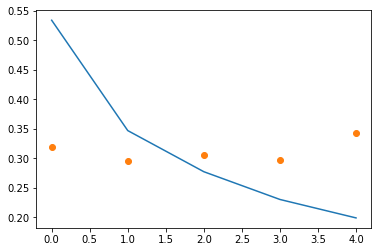

In [18]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [19]:
test_loss, test_acc = net.evaluate(X_test,y_test)

25000/25000 [==============================] - 4s 148us/step


In [20]:
import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)

y_train = y_data[:1395]
y_test = y_data[1395:]

# 데이터의 모양 출력하기
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


In [21]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = True))   
    model.add(SimpleRNN(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [24]:
model = KerasClassifier(build_fn = stacked_vanilla_rnn, epochs = 10, batch_size = 50, verbose = 1)

In [25]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)
print(accuracy_score(y_pred, y_test_))

Epoch 1/10
1395/1395 [==============================] - 1s 417us/step - loss: 2.5203 - accuracy: 0.5154
Epoch 2/10
1395/1395 [==============================] - 0s 210us/step - loss: 1.2580 - accuracy: 0.7147
Epoch 3/10
1395/1395 [==============================] - 0s 214us/step - loss: 1.1817 - accuracy: 0.7147
Epoch 4/10
1395/1395 [==============================] - 0s 247us/step - loss: 1.1598 - accuracy: 0.7147
Epoch 5/10
1395/1395 [==============================] - 0s 230us/step - loss: 1.1408 - accuracy: 0.7147
Epoch 6/10
1395/1395 [==============================] - 0s 207us/step - loss: 1.1094 - accuracy: 0.7147
Epoch 7/10
1395/1395 [==============================] - 0s 204us/step - loss: 1.1062 - accuracy: 0.7147
Epoch 8/10
1395/1395 [==============================] - 0s 215us/step - loss: 1.0984 - accuracy: 0.7147
Epoch 9/10
1395/1395 [==============================] - 0s 237us/step - loss: 1.0856 - accuracy: 0.7147
Epoch 10/10
599/599 [==============================] - 0s 363us/